In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tld

     |████████████████████████████████| 412 kB 5.1 MB/s 


Following function then gives domain name. It takes as an argument an URL and returns the domain name:

In [ ]:
from tld import get_tld
import matplotlib.pyplot as plt
import pandas as pd

def get_domain(url):
    res = get_tld(url, as_object=True)
    return res.tld


Read the Data

In [ ]:
import bz2
import json

path_to_file = '/content/drive/MyDrive/quotes-2019-nytimes.json.bz2' 
#path_to_out = '/content/quotes-2020-domains.json.bz2'
domains = []
speakers = []
quotation = []
popularity = []

with bz2.open(path_to_file, 'rb') as s_file:
        for instance in s_file:
            instance = json.loads(instance) # loading a sample
            urls = instance['urls'] # extracting list of links
            popularity.append(len(instance['urls']) - 1)
            domains.append(instance['urls'])
            quotation.append(instance['quotation'])
            speakers.append(instance['speaker'])
            
            

Extract NYT Links from the domain

In [ ]:

from urllib.parse import * 
parse_url = urlparse(domains[1][0])
nyt_urls = []
non_nyt = []

for domain in domains:
  count = 0
  for url in domain:
    parsed_url = urlparse(url)
    if parsed_url.netloc == 'www.nytimes.com' or parsed_url.netloc == 'nytimes.com' or parsed_url.netloc == 'mobile.nytimes.com' or parsed_url.netloc == 'feeds.nytimes.com':
      nyt_urls.append(parsed_url)
      count = 1  
      break 
  if count == 0:
    nyt_urls.append(urlparse('https://www.nytimes.com/unknown'))
    non_nyt.append(domain)



Extract Topics from NYT Links

In [ ]:
topics = []
for url in nyt_urls:
  count = 0
  start = 12
  if url.path[1:] == 'unknown':
    topics.append('unknown')
    continue  
  if url.netloc == 'feeds.nytimes.com':
    start = 24
  if url.path[1:12] == 'interactive':
    start = 24
  if url.path[1:5] == 'live':
    topics.append('live')
    continue  
  
  for letter in url.path[start:]:
    if letter == '/':
      break
    count = count+ 1
  topics.append(url.path[start:][:count])

Create Pandas DataFrame. Contains Topic, Speaker, Quotation which are defined above and popularity which is the number of news outlets that have shared the news item

In [ ]:

data = pd.DataFrame(topics, columns =['topic'])
data['speaker'] = speakers
data['quotation'] = quotation
data['popularity'] = popularity
data.head()


,topic,speaker,quotation,popularity
0,realestate,James Fisher,"It is not a low-income immigration,",0
1,opinion,John Updike,a champion figure skater switching to roller s...,1
2,world,None,It makes it much more difficult for him to mak...,0
3,technology,Xavier Becerra,"It puts me in a predicament,",2
4,books,None,A Pile of Leaves.,0


Plot the counts of the most popular topics published by NYT

In [ ]:
top10 = data.groupby('topic').count()['speaker'].sort_values(ascending=False)[:10]

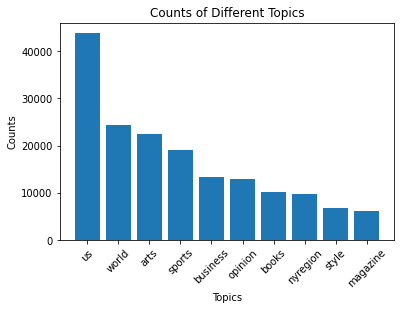

In [ ]:
plt.xticks(rotation=45)
plt.bar(list(top10.index), top10.values)
plt.title('Counts of Different Topics')
plt.ylabel('Counts')
plt.xlabel('Topics')
plt.show()

Print the most popular speakers for different topics 

In [ ]:
data_filtered = data[data.speaker != 'None']
famous_speaker = data_filtered.groupby(['topic', 'speaker']).count()['popularity']

In [ ]:
print("Most Popular Speakers wrt different topics")
famous_speaker.sort_values(ascending=False)[:20]

Most Popular Speakers wrt different topics


topic     speaker               
us        President Donald Trump    1317
          President Trump           1086
          Joe Biden                  611
          Elizabeth Warren           583
          Bernie Sanders             426
          Nancy Pelosi               408
          Pete Buttigieg             397
world     President Donald Trump     288
nyregion  Bill de Blasio             271
opinion   President Donald Trump     265
arts      Stephen Colbert            256
us        Cory Booker                251
world     Mike Pompeo                232
opinion   President Trump            232
world     President Trump            209
us        Amy Klobuchar              204
          Mitch McConnell            201
arts      JIMMY KIMMEL               199
business  President Trump            196
arts      STEPHEN COLBERT            189
Name: popularity, dtype: int64

Plot the popularity of the major topics. Popularity is the average number of news outlets that share a particular news item

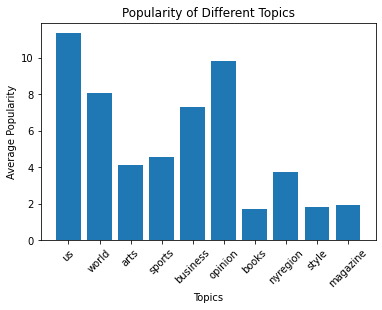

In [ ]:
popularity_top10 = data.groupby('topic').mean()['popularity'][top10.index]
plt.xticks(rotation=45)
plt.bar(list(popularity_top10.index), popularity_top10.values)
plt.title('Popularity of Different Topics')
plt.ylabel('Average Popularity')
plt.xlabel('Topics')
plt.show()